# Dependencies


In [82]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [7]:
# Displaying df with all columns available 
pd.set_option("display.max_columns",None,"display.max_rows",None)

In [46]:
# Reading and storing in data csv file
data_df = pd.read_csv("../../Data/Team_Stats/2000-2019_cleaned_data5.csv")

# Displaying dataframe
data_df

Year  Rk_Off                  Team  Win  Loss  Games  PF_Off  \
0    2000       1        St. Louis Rams   10     6     16     540   
1    2000       2        Denver Broncos   11     5     16     485   
2    2000       3       Oakland Raiders   12     4     16     479   
3    2000       4    Indianapolis Colts   10     6     16     429   
4    2000       5     Minnesota Vikings   11     5     16     397   
5    2000       6  Tampa Bay Buccaneers   10     6     16     388   
6    2000       7   San Francisco 49ers    6    10     16     388   
7    2000       8  Jacksonville Jaguars    7     9     16     367   
8    2000       9    Kansas City Chiefs    7     9     16     355   
9    2000      10    New Orleans Saints   10     6     16     354   
10   2000      11     Green Bay Packers    9     7     16     353   
11   2000      12   Philadelphia Eagles   11     5     16     351   
12   2000      13      Tennessee Titans   13     3     16     346   
13   2000      14      Baltimore Ravens   12     4     16     333   
14   2000      15       New York Giants   12     4     16     328   
15   2000      16        Miami Dolphins   11     5     16     323   
16   2000      17   Pittsburgh Steelers    9     7     16     321   
17   2000      18         New York Jets    9     7     16     321   
18   2000      19      Seattle Seahawks    6    10     16     320   
19   2000      20         Buffalo Bills    8     8     16     315   
20   2000      21     Carolina Panthers    7     9     16     310   
21   2000      22         Detroit Lions    9     7     16     307   
22   2000      23        Dallas Cowboys    5    11     16     294   
23   2000      24   Washington Redskins    8     8     16     281   
24   2000      25  New England Patriots    5    11     16     276   
25   2000      26    San Diego Chargers    1    15     16     269   
26   2000      27       Atlanta Falcons    4    12     16     252   
27   2000      28         Chicago Bears    5    11     16     216   
28   2000      29     Arizona Cardinals    3    13     16     210   
29   2000      30    Cincinnati Bengals    4    12     16     185   
30   2000      31      Cleveland Browns    3    13     16     161   
31   2001       1        St. Louis Rams   14     2     16     503   
32   2001       2    Indianapolis Colts    6    10     16     413   
33   2001       3   San Francisco 49ers   12     4     16     409   
34   2001       4       Oakland Raiders   10     6     16     399   
35   2001       5     Green Bay Packers   12     4     16     390   
36   2001       6  New England Patriots   11     5     16     371   
37   2001       7   Pittsburgh Steelers   13     3     16     352   
38   2001       8        Miami Dolphins   11     5     16     344   
39   2001       9   Philadelphia Eagles   11     5     16     343   
40   2001      10        Denver Broncos    8     8     16     340   
41   2001      11         Chicago Bears   13     3     16     338   
42   2001      12      Tennessee Titans    7     9     16     336   
43   2001      13    New Orleans Saints    7     9     16     333   
44   2001      14    San Diego Chargers    5    11     16     332   
45   2001      15  Tampa Bay Buccaneers    9     7     16     324   
46   2001      16    Kansas City Chiefs    6    10     16     320   
47   2001      17         New York Jets   10     6     16     308   
48   2001      18      Baltimore Ravens   10     6     16     303   
49   2001      19      Seattle Seahawks    9     7     16     301   
50   2001      20     Arizona Cardinals    7     9     16     295   
51   2001      21       New York Giants    7     9     16     294   
52   2001      22  Jacksonville Jaguars    6    10     16     294   
53   2001      23       Atlanta Falcons    7     9     16     291   
54   2001      24     Minnesota Vikings    5    11     16     290   
55   2001      25      Cleveland Browns    7     9     16     285   
56   2001      26         Detroit Lions    2    14     16     270   
57 

# EDA / Preprocessing

In [ ]:
# Finding columns with null values
data_df.isna().sum()

# Targets

In [47]:
# Storing next years win loss ratio in the targets variable
targets = data_df.loc[:,"NY_Win/Loss_Pct"].values

# Displaying the targets
targets


array([0.875 , 0.5   , 0.625 , 0.375 , 0.3125, 0.5625, 0.75  , 0.375 ,
       0.375 , 0.4375, 0.75  , 0.6875, 0.4375, 0.625 , 0.4375, 0.6875,
       0.8125, 0.625 , 0.5625, 0.1875, 0.0625, 0.125 , 0.3125, 0.5   ,
       0.6875, 0.3125, 0.4375, 0.8125, 0.4375, 0.375 , 0.4375, 0.4375,
       0.625 , 0.625 , 0.6875, 0.75  , 0.5625, 0.625 , 0.5625, 0.75  ,
       0.5625, 0.25  , 0.6875, 0.5625, 0.5   , 0.75  , 0.5   , 0.5625,
       0.4375, 0.4375, 0.3125, 0.625 , 0.375 , 0.5625, 0.375 , 0.5625,
       0.1875, 0.5   , 0.4375, 0.4375, 0.3125, 0.125 , 0.8125, 0.25  ,
       0.5   , 0.75  , 0.3125, 0.625 , 0.625 , 0.375 , 0.5625, 0.875 ,
       0.375 , 0.625 , 0.4375, 0.75  , 0.375 , 0.625 , 0.75  , 0.4375,
       0.3125, 0.25  , 0.3125, 0.25  , 0.625 , 0.75  , 0.3125, 0.3125,
       0.4375, 0.5   , 0.25  , 0.6875, 0.625 , 0.3125, 0.4375, 0.5   ,
       0.75  , 0.625 , 0.3125, 0.5   , 0.5625, 0.5625, 0.125 , 0.625 ,
       0.8125, 0.875 , 0.5   , 0.5   , 0.4375, 0.75  , 0.25  , 0.3125,
      

## Target distribution

Text(0.5, 1.015, 'Distribution of Next-year wins/loss ratio')

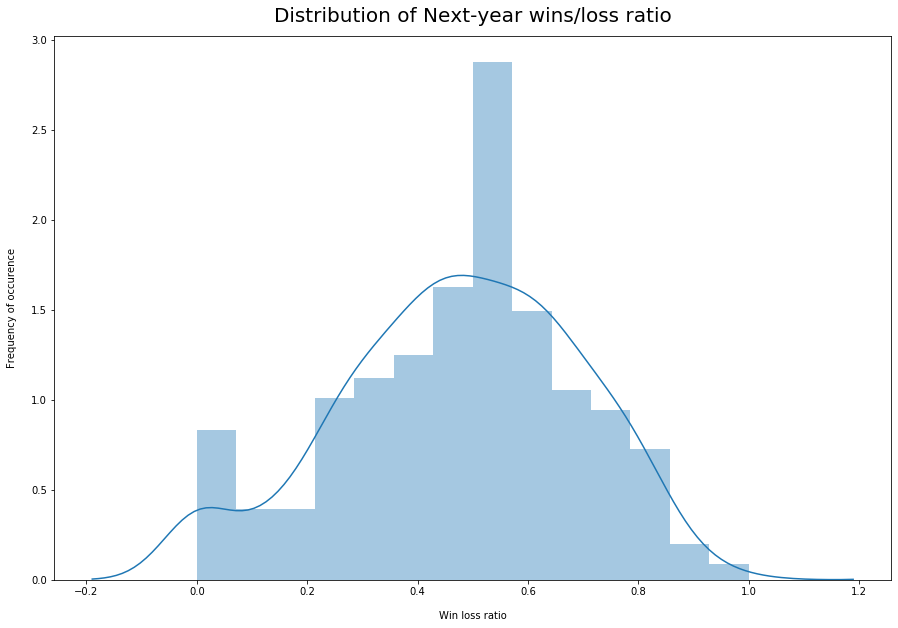

In [11]:
# Visualizing the distribution of the target data
plt.figure(figsize=(15,10)) 
sns.distplot(targets)
plt.xlabel("Win loss ratio", labelpad=14)
plt.ylabel("Frequency of occurence", labelpad=14)
plt.title("Distribution of Next-year wins/loss ratio", y=1.015, fontsize=20)

# Inputs

In [48]:
# inputs = data_df[["Rk_Off", "Total Yds_Off", "Plays_Off","Y/P_Off",
#  "1stD_Off","Pass Att_Off","Pass TD_Off", "Pass NY/A_Off",
#  "Pen Yds_Off","Total Yds_Def", "Ply_Def","Y/P_Def",
#  "FL_Def","Total 1stD_Def","Pass Yds_Def","Pass TD_Def",
#  "Rush TD_Def"]]
# inputs = data_df.drop(columns=["Team" , "Year", "Win", "Loss", "Games","Win/Loss_Pct"])

# Storing input data
inputs = data_df.drop(columns=["Year","Team","Win/Loss_Pct","Games","NY_Win/Loss_Pct","NY_Win","NY_Loss"])

# Storing the input column names
feature_names = inputs.columns

# Displaying the inputs
inputs




Rk_Off  Win  Loss  PF_Off  Total Yds_Off  Plays_Off  Y/P_Off  TO_Off  \
0         1   10     6     540           7075       1014      7.0      35   
1         2   11     5     485           6554       1115      5.9      25   
2         3   12     4     479           5776       1023      5.6      20   
3         4   10     6     429           6141       1026      6.0      29   
4         5   11     5     397           5961        958      6.2      28   
5         6   10     6     388           4649        961      4.8      24   
6         7    6    10     388           6040       1024      5.9      19   
7         8    7     9     367           5690       1080      5.3      29   
8         9    7     9     355           5614        999      5.6      26   
9        10   10     6     354           5397       1041      5.2      26   
10       11    9     7     353           5321       1038      5.1      33   
11       12   11     5     351           5006       1017      4.9      29   
12       13   13     3     346           5350       1036      5.2      30   
13       14   12     4     333           5014       1058      4.7      26   
14       15   12     4     328           5376       1064      5.1      24   
15       16   11     5     323           4461        945      4.7      26   
16       17    9     7     321           4766       1009      4.7      21   
17       18    9     7     321           5395       1075      5.0      40   
18       19    6    10     320           4680        956      4.9      38   
19       20    8     8     315           5498       1080      5.1      23   
20       21    7     9     310           4654        998      4.7      35   
21       22    9     7     307           4422       1004      4.4      31   
22       23    5    11     294           4475        943      4.7      39   
23       24    8     8     281           5396       1038      5.2      33   
24       25    5    11     276           4571       1037      4.4      25   
25       26    1    15     269           4300        982      4.4      50   
26       27    4    12     252           3994        925      4.3      34   
27       28    5    11     216           4541        993      4.6      29   
28       29    3    13     210           4528        932      4.9      44   
29       30    4    12     185           4260       1001      4.3      35   
30       31    3    13     161           3530        859      4.1      28   
31        1   14     2     503           6690       1007      6.6      44   
32        2    6    10     413           5955       1025      5.8      38   
33        3   12     4     409           5689       1041      5.5      19   
34        4   10     6     399           5361       1030      5.2      25   
35        5   12     4     390           5463        942      5.8      27   
36        6   11     5     371           4882       1001      4.9      28   
37        7   13     3     352           5887       1065      5.5      21   
38        8   11     5     344           4821        953      5.1      38   
39        9   11     5     343           4923        974      5.1      24   
40       10    8     8     340           4817       1034      4.7      27   
41       11   13     3     338           4694       1020      4.6      24   
42       12    7     9     336           5352       1026      5.2      28   
43       13    7     9     333           5226       1031      5.1      35   
44       14    5    11     332           5200       1010      5.1      29   
45       15    9     7     324           4694       1046      4.5      22   
46       16    6    10     320           5673       1015      5.6      33   
47       17   10     6     308           4795        928      5.2      21   
48       18   10     6     303           5124       1080      4.7      36   
49       19    9     7     301           4772        980      4.9      21   
50       20    7     9     295           4898        955      5.1      27   
5

## Input Distributions

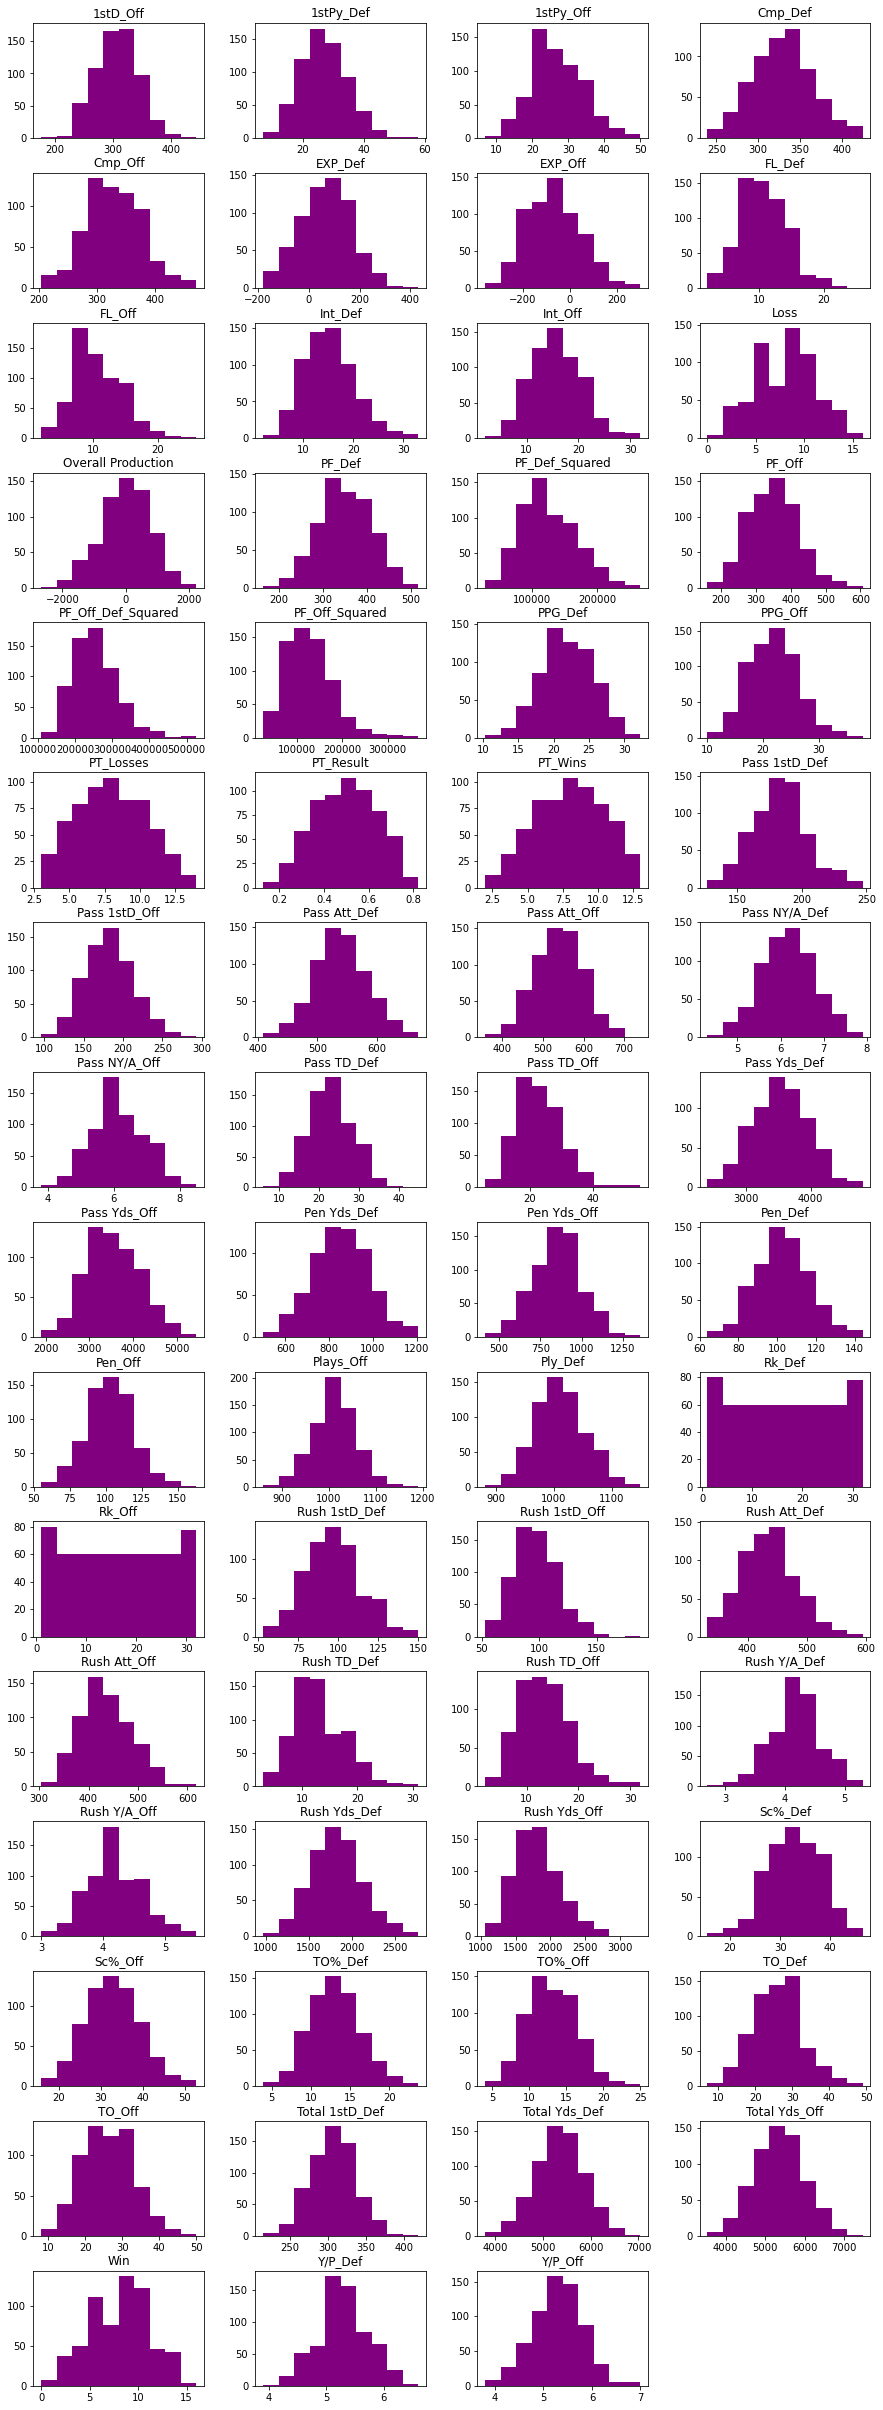

In [53]:
# Displaying the inputs as histograms
inputs.hist(figsize=(15, 60), color="purple", grid=False, sharex=False, sharey=False, layout=(22,4))
plt.show()

# Scaling the data

In [63]:
# Creating the sc object from the StandardScaler class
sc = StandardScaler()

# Fitting and transforming the inputs
scaled_inputs = sc.fit_transform(inputs)

# Splitting the data

In [64]:
# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, random_state=0)

## VIF

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif["features"] = inputs.columns

In [62]:
inputs = inputs.drop(columns=inf_list)

In [60]:
inf = vif.loc[vif["VIF Factor"] > 11]

In [61]:
inf_list = list(inf['features'])

In [66]:
vif.sort_values("VIF Factor",ascending=False)

VIF Factor     features
6     7.675055      EXP_Off
3     6.281933  Pen Yds_Off
14    6.253836      EXP_Def
2     6.162966      Pen_Off
4     5.218559      Sc%_Off
11    4.694618  Pen Yds_Def
10    4.490265      Pen_Def
12    4.142293      Sc%_Def
0     4.140321  Pass TD_Off
8     2.835354  Pass TD_Def
1     2.472098  Rush TD_Off
9     2.434697  Rush TD_Def
13    1.787793      TO%_Def
5     1.697740      TO%_Off
7     1.601102      Cmp_Def

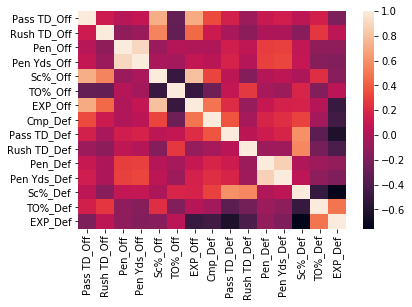

In [93]:
corr_df = inputs.corr()
sns.heatmap(corr_df)

# ML Models

## Linear Regression

In [90]:
# Creating regressor object from Linear Regression Class
regressor = LinearRegression()

# Fitting training data on the regressor object
regressor.fit(x_train, y_train)

# Displaying the r2-score of the test data
regressor.score(x_test, y_test)

0.003829614422526051

In [69]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(x_test)

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df

Prediction  Actual  Residual
0      6.951337     6.0 -0.951337
1      7.241702     9.0  1.758298
2      7.842430     4.0 -3.842430
3      5.857554     9.0  3.142446
4      5.448845    12.0  6.551155
5      8.887301     5.0 -3.887301
6      6.452844     2.0 -4.452844
7      9.200907     0.0 -9.200907
8      9.728019     6.0 -3.728019
9      9.726070     7.0 -2.726070
10     9.340984     7.0 -2.340984
11     5.760787    12.0  6.239213
12     6.743017     8.0  1.256983
13     8.157198     4.0 -4.157198
14     7.013194     0.0 -7.013194
15     9.918896    10.0  0.081104
16     7.072725     9.0  1.927275
17     8.334492     5.0 -3.334492
18     5.259092     0.0 -5.259092
19     6.917271     7.0  0.082729
20     6.294914    13.0  6.705086
21     7.860036     7.0 -0.860036
22     7.241004     9.0  1.758996
23     7.217150    11.0  3.782850
24     9.794803    12.0  2.205197
25     5.233860     7.0  1.766140
26     8.380045     9.0  0.619955
27     7.586856     8.0  0.413144
28     7.283597     6.0 -1.283597
29     9.751840    11.0  1.248160
30     5.260896     5.0 -0.260896
31     8.971008    14.0  5.028992
32     7.223903    11.0  3.776097
33     5.265693     1.0 -4.265693
34     6.226823    10.0  3.773177
35     6.244652    10.0  3.755348
36     7.552301     6.0 -1.552301
37     7.092958    11.0  3.907042
38     8.196010     9.0  0.803990
39     7.139421    12.0  4.860579
40     5.399964    12.0  6.600036
41     8.729930    10.0  1.270070
42     9.424559     8.0 -1.424559
43     7.368567    12.0  4.631433
44     7.708033    10.0  2.291967
45     5.082194     1.0 -4.082194
46     6.489644     6.0 -0.489644
47    10.164345    10.0 -0.164345
48     6.785517    14.0  7.214483
49     9.449058    12.0  2.550942
50     7.667689     6.0 -1.667689
51     8.097701     9.0  0.902299
52     7.863242     8.0  0.136758
53     4.855459     8.0  3.144541
54     6.691195     6.0 -0.691195
55     8.926687     4.0 -4.926687
56     9.290578    10.0  0.709422
57     6.867335    11.0  4.132665
58     6.378012     6.0 -0.378012
59     8.660664     9.0  0.339336
60    10.153116     7.0 -3.153116
61    11.428737    11.0 -0.428737
62     7.478393     4.0 -3.478393
63     7.196262     9.0  1.803738
64     5.581895     7.0  1.418105
65     9.152193     3.0 -6.152193
66     5.127200     6.0  0.872800
67     6.618365     7.0  0.381635
68     7.206320    11.0  3.793680
69     7.880463     8.0  0.119537
70     6.829924    10.0  3.170076
71     8.779731     4.0 -4.779731
72     7.188396    13.0  5.811604
73    10.183346     8.0 -2.183346
74     7.041867     8.0  0.958133
75     6.761356    10.0  3.238644
76     9.854758     9.0 -0.854758
77     4.018387     7.0  2.981613
78     9.406662     8.0 -1.406662
79     4.802578     0.0 -4.802578
80     9.538014    16.0  6.461986
81     9.578217    12.0  2.421783
82     9.501854    12.0  2.498146
83     9.251409     9.0 -0.251409
84     4.963660     4.0 -0.963660
85     7.738561     6.0 -1.738561
86     5.795051    11.0  5.204949
87     9.378424    12.0  2.621576
88    11.096939     7.0 -4.096939
89     7.793038     2.0 -5.793038
90     5.402772    10.0  4.597228
91     9.063856     7.0 -2.063856
92     6.232730     4.0 -2.232730
93     8.998996     0.0 -8.998996
94     8.228373     6.0 -2.228373
95     6.060953     7.0  0.939047
96     5.704376     8.0  2.295624
97     5.055653     7.0  1.944347
98     8.139163     7.0 -1.139163
99     6.689706     4.0 -2.689706
100    8.499368     6.0 -2.499368
101    6.105188     0.0 -6.105188
102    3.749914     2.0 -1.749914
103    7.386284     9.0  1.613716
104    6.747258     2.0 -4.747258
105    9.762790    10.0  0.237210
106    6.988074     5.0 -1.988074
107    6.727552    11.0  4.272448
108    6.312520     8.0  1.687480
109    8.284186    11.0  2.715814
110    6.615101    10.0  3.384899
111    5.929593     6.0  0.070407
112    7.095601     8.0  0.904399
113    8.330367     8.0 -0.330367
114    5.985180     4.0 -1.985180
115    7.693658     8.0  0.306342
116    9.137404     7.0 -2.

In [70]:
# Average residual for linear regression
residual_df["Residual"].mean()

0.3262745982816411

## Random Forest 

In [85]:
# Creating a regressor object from the Random Forest Regressor 
regressor = RandomForestRegressor(n_estimators=500, random_state=0)

# Fitting the training data to the regressor object
regressor.fit(sc.inverse_transform(x_train), y_train)

# Storing the Random Forest Regressor feature importances in the importance variable
importance = sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

# Displaying the importance 
importance


[(0.1468449726070425, 'Int_Off'),
 (0.09702682250710624, 'Total Yds_Off'),
 (0.07519559360698237, 'Plays_Off'),
 (0.0750106028578136, 'Y/P_Off'),
 (0.07002860187957208, 'Pass TD_Off'),
 (0.06587963235247701, 'Pass Yds_Off'),
 (0.06536952636427897, 'Loss'),
 (0.06465908290129124, 'TO_Off'),
 (0.054979655698546556, '1stD_Off'),
 (0.0546454570389412, 'Pass Att_Off'),
 (0.051159629532995174, 'FL_Off'),
 (0.049617658672254046, 'PF_Off'),
 (0.04513262092466471, 'Rk_Off'),
 (0.04363593269989139, 'Win'),
 (0.04081421035614295, 'Cmp_Off')]

In [89]:
# Displaying the r2 score of the random forest regressor 
regressor.score(sc.inverse_transform(x_test), y_test)

0.003421589352085141

In [73]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(x_test)

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df

Prediction  Actual  Residual
0         6.514     6.0    -0.514
1         8.086     9.0     0.914
2         7.258     4.0    -3.258
3         4.224     9.0     4.776
4         6.644    12.0     5.356
5         7.726     5.0    -2.726
6         6.262     2.0    -4.262
7        10.394     0.0   -10.394
8         8.020     6.0    -2.020
9         8.960     7.0    -1.960
10        9.016     7.0    -2.016
11        5.086    12.0     6.914
12        7.064     8.0     0.936
13        8.226     4.0    -4.226
14        8.020     0.0    -8.020
15        8.976    10.0     1.024
16        6.626     9.0     2.374
17        8.012     5.0    -3.012
18        5.380     0.0    -5.380
19        5.566     7.0     1.434
20        5.518    13.0     7.482
21        7.652     7.0    -0.652
22        7.578     9.0     1.422
23        7.024    11.0     3.976
24       10.260    12.0     1.740
25        7.042     7.0    -0.042
26        6.400     9.0     2.600
27        7.838     8.0     0.162
28        7.854     6.0    -1.854
29        9.074    11.0     1.926
30        4.182     5.0     0.818
31        8.544    14.0     5.456
32        7.438    11.0     3.562
33        6.622     1.0    -5.622
34        6.072    10.0     3.928
35        7.222    10.0     2.778
36        7.360     6.0    -1.360
37        7.862    11.0     3.138
38        7.136     9.0     1.864
39        9.772    12.0     2.228
40        5.240    12.0     6.760
41        6.956    10.0     3.044
42        8.878     8.0    -0.878
43        6.026    12.0     5.974
44        8.036    10.0     1.964
45        4.986     1.0    -3.986
46        7.724     6.0    -1.724
47        9.390    10.0     0.610
48        7.094    14.0     6.906
49        9.846    12.0     2.154
50        9.408     6.0    -3.408
51        7.276     9.0     1.724
52        7.418     8.0     0.582
53        5.880     8.0     2.120
54        6.908     6.0    -0.908
55        8.942     4.0    -4.942
56        7.738    10.0     2.262
57        7.416    11.0     3.584
58        7.458     6.0    -1.458
59        8.814     9.0     0.186
60        8.450     7.0    -1.450
61        9.568    11.0     1.432
62        7.100     4.0    -3.100
63        7.340     9.0     1.660
64        4.584     7.0     2.416
65        8.252     3.0    -5.252
66        5.120     6.0     0.880
67        7.834     7.0    -0.834
68        7.184    11.0     3.816
69        9.454     8.0    -1.454
70        7.830    10.0     2.170
71        9.622     4.0    -5.622
72        7.666    13.0     5.334
73        9.084     8.0    -1.084
74        7.572     8.0     0.428
75        7.544    10.0     2.456
76        8.616     9.0     0.384
77        5.988     7.0     1.012
78        9.364     8.0    -1.364
79        5.006     0.0    -5.006
80        9.792    16.0     6.208
81       10.762    12.0     1.238
82        7.892    12.0     4.108
83        8.704     9.0     0.296
84        5.892     4.0    -1.892
85        7.560     6.0    -1.560
86        6.348    11.0     4.652
87        9.950    12.0     2.050
88        8.656     7.0    -1.656
89        7.042     2.0    -5.042
90        7.584    10.0     2.416
91        9.002     7.0    -2.002
92        7.150     4.0    -3.150
93       10.214     0.0   -10.214
94        7.238     6.0    -1.238
95        8.568     7.0    -1.568
96        5.668     8.0     2.332
97        5.556     7.0     1.444
98        8.836     7.0    -1.836
99        7.160     4.0    -3.160
100       7.356     6.0    -1.356
101       4.490     0.0    -4.490
102       5.090     2.0    -3.090
103       8.240     9.0     0.760
104       6.906     2.0    -4.906
105       9.414    10.0     0.586
106       8.158     5.0    -3.158
107       6.730    11.0     4.270
108       6.850     8.0     1.150
109       8.468    11.0     2.532
110       7.232    10.0     2.768
111       6.176     6.0    -0.176
112       7.736     8.0     0.264
113       8.338     8.0    -0.338
114       6.980     4.0    -2.980
115       9.656     8.0    -1.656
116       9.104     7.0    

In [74]:
# Average residual for Random Forest Regressor
residual_df["Residual"].mean()

0.24978749999999988

## Support Vector Regression

In [75]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

-0.11543357280702903

In [76]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(x_test)

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df

Prediction  Actual   Residual
0      6.262361     6.0  -0.262361
1      8.904643     9.0   0.095357
2      4.279373     4.0  -0.279373
3      1.558816     9.0   7.441184
4      4.731729    12.0   7.268271
5      7.288292     5.0  -2.288292
6      5.677644     2.0  -3.677644
7     12.365807     0.0 -12.365807
8      8.768723     6.0  -2.768723
9      8.212409     7.0  -1.212409
10     9.101649     7.0  -2.101649
11     6.908768    12.0   5.091232
12     5.873352     8.0   2.126648
13     8.404356     4.0  -4.404356
14     8.148251     0.0  -8.148251
15     9.498681    10.0   0.501319
16     7.761623     9.0   1.238377
17     7.377016     5.0  -2.377016
18     7.354081     0.0  -7.354081
19     5.001675     7.0   1.998325
20     3.950173    13.0   9.049827
21     6.973754     7.0   0.026246
22     7.245042     9.0   1.754958
23     9.288818    11.0   1.711182
24     8.401791    12.0   3.598209
25     5.929831     7.0   1.070169
26     7.632472     9.0   1.367528
27     7.773890     8.0   0.226110
28     7.198442     6.0  -1.198442
29    11.714415    11.0  -0.714415
30     3.879254     5.0   1.120746
31     7.640229    14.0   6.359771
32     7.693919    11.0   3.306081
33     5.979864     1.0  -4.979864
34     5.850414    10.0   4.149586
35     4.818181    10.0   5.181819
36     6.990111     6.0  -0.990111
37     8.554924    11.0   2.445076
38     9.983188     9.0  -0.983188
39     7.446087    12.0   4.553913
40     6.390493    12.0   5.609507
41     9.794884    10.0   0.205116
42    10.223206     8.0  -2.223206
43     5.316345    12.0   6.683655
44     8.605959    10.0   1.394041
45     4.410676     1.0  -3.410676
46     5.515074     6.0   0.484926
47     8.560551    10.0   1.439449
48     6.640991    14.0   7.359009
49     7.175363    12.0   4.824637
50     8.526406     6.0  -2.526406
51     8.834544     9.0   0.165456
52     7.834765     8.0   0.165235
53     6.515437     8.0   1.484563
54     7.369230     6.0  -1.369230
55     7.875550     4.0  -3.875550
56    10.363035    10.0  -0.363035
57     7.376396    11.0   3.623604
58     6.691167     6.0  -0.691167
59     6.529762     9.0   2.470238
60     8.863368     7.0  -1.863368
61    10.991612    11.0   0.008388
62     7.852147     4.0  -3.852147
63     6.542653     9.0   2.457347
64     4.023480     7.0   2.976520
65     7.732315     3.0  -4.732315
66     2.945082     6.0   3.054918
67     8.509747     7.0  -1.509747
68    11.222414    11.0  -0.222414
69    10.080307     8.0  -2.080307
70     8.108446    10.0   1.891554
71     7.426917     4.0  -3.426917
72     8.866551    13.0   4.133449
73    10.182893     8.0  -2.182893
74     8.872535     8.0  -0.872535
75     7.539983    10.0   2.460017
76     8.421366     9.0   0.578634
77     7.381007     7.0  -0.381007
78    11.826114     8.0  -3.826114
79     4.221157     0.0  -4.221157
80    10.566608    16.0   5.433392
81    11.125561    12.0   0.874439
82     8.847784    12.0   3.152216
83     9.163896     9.0  -0.163896
84     3.935251     4.0   0.064749
85     7.991383     6.0  -1.991383
86     8.499437    11.0   2.500563
87    10.913937    12.0   1.086063
88     8.326379     7.0  -1.326379
89     8.930359     2.0  -6.930359
90     4.897389    10.0   5.102611
91     9.187605     7.0  -2.187605
92     7.309457     4.0  -3.309457
93     7.716613     0.0  -7.716613
94     6.500928     6.0  -0.500928
95     7.532203     7.0  -0.532203
96     5.963254     8.0   2.036746
97     5.841663     7.0   1.158337
98    13.310815     7.0  -6.310815
99     7.704034     4.0  -3.704034
100    6.498160     6.0  -0.498160
101    3.201147     0.0  -3.201147
102    2.477309     2.0  -0.477309
103    7.879810     9.0   1.120190
104    6.127356     2.0  -4.127356
105    9.304655    10.0   0.695345
106    6.045720     5.0  -1.045720
107    6.473428    11.0   4.526572
108    8.958930     8.0  -0.958930
109    7.728677    11.0   3.271323
110    5.100032    10.0   4.899968
111    4.590639     6.0   1.409361
112    7.103095     8.0   0.896905
113    7.577139

In [77]:
# Average residual for linear regression
residual_df["Residual"].mean()

0.28868987516622424

## Polynomial Linear Regression 

In [78]:
# Creating a polyReg object from the PolynomialFeatures class 
polyReg = PolynomialFeatures(degree = 3)

# Fitting and transforming the featuring training data to have the polyReg Object's degrees
polyInputs = polyReg.fit_transform(x_train)

# Creating a regressor object from the LinearRegression Class
regressor = LinearRegression()

# Fitting the regressor with the transformed input data and the target training data
regressor.fit(polyInputs,y_train)

# Displaying the score of the polynomial regressor
regressor.score(polyReg.transform(x_test),y_test)

-8.084860153194265

In [79]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(polyReg.transform(x_test))

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df

Prediction  Actual   Residual
0      8.130102     6.0  -2.130102
1      6.026315     9.0   2.973685
2      6.892506     4.0  -2.892506
3     -7.575916     9.0  16.575916
4    -30.879025    12.0  42.879025
5      7.375455     5.0  -2.375455
6      1.188712     2.0   0.811288
7     33.906000     0.0 -33.906000
8      5.611466     6.0   0.388534
9      8.071674     7.0  -1.071674
10     5.462711     7.0   1.537289
11    47.276949    12.0 -35.276949
12    -0.362523     8.0   8.362523
13    14.595073     4.0 -10.595073
14    16.863852     0.0 -16.863852
15    15.518064    10.0  -5.518064
16     2.176267     9.0   6.823733
17     2.992621     5.0   2.007379
18    16.055830     0.0 -16.055830
19    -3.390900     7.0  10.390900
20    24.626244    13.0 -11.626244
21     9.861703     7.0  -2.861703
22     8.775165     9.0   0.224835
23     8.893004    11.0   2.106996
24     8.547188    12.0   3.452812
25    17.132474     7.0 -10.132474
26    26.501576     9.0 -17.501576
27     1.387123     8.0   6.612877
28     4.569893     6.0   1.430107
29    15.380614    11.0  -4.380614
30     7.270721     5.0  -2.270721
31     6.913895    14.0   7.086105
32    28.968787    11.0 -17.968787
33    17.322144     1.0 -16.322144
34     6.618065    10.0   3.381935
35     4.003025    10.0   5.996975
36     8.670527     6.0  -2.670527
37    13.318843    11.0  -2.318843
38     7.399991     9.0   1.600009
39     8.424723    12.0   3.575277
40    17.346620    12.0  -5.346620
41    33.871621    10.0 -23.871621
42    -9.542234     8.0  17.542234
43     9.654129    12.0   2.345871
44     4.530641    10.0   5.469359
45     7.488947     1.0  -6.488947
46     8.991992     6.0  -2.991992
47    18.688122    10.0  -8.688122
48    -8.837112    14.0  22.837112
49    -6.007680    12.0  18.007680
50     9.456508     6.0  -3.456508
51    10.459743     9.0  -1.459743
52    17.338621     8.0  -9.338621
53    12.526421     8.0  -4.526421
54    13.635640     6.0  -7.635640
55     3.447172     4.0   0.552828
56    17.038207    10.0  -7.038207
57    10.195714    11.0   0.804286
58    10.046768     6.0  -4.046768
59    15.961183     9.0  -6.961183
60    14.994599     7.0  -7.994599
61    17.091400    11.0  -6.091400
62    14.935796     4.0 -10.935796
63    15.642765     9.0  -6.642765
64    12.865167     7.0  -5.865167
65    14.154035     3.0 -11.154035
66     4.931893     6.0   1.068107
67    13.885198     7.0  -6.885198
68    -0.107384    11.0  11.107384
69     9.374435     8.0  -1.374435
70    -6.805333    10.0  16.805333
71     6.679860     4.0  -2.679860
72    41.488728    13.0 -28.488728
73    15.064416     8.0  -7.064416
74    16.644215     8.0  -8.644215
75     8.150277    10.0   1.849723
76     4.684465     9.0   4.315535
77     3.498291     7.0   3.501709
78    26.533231     8.0 -18.533231
79     9.025846     0.0  -9.025846
80    13.354027    16.0   2.645973
81    28.507842    12.0 -16.507842
82     0.231080    12.0  11.768920
83    19.259744     9.0 -10.259744
84     7.070230     4.0  -3.070230
85     2.338457     6.0   3.661543
86   -14.655229    11.0  25.655229
87    11.856770    12.0   0.143230
88    28.210259     7.0 -21.210259
89    10.860684     2.0  -8.860684
90     7.163655    10.0   2.836345
91    -0.242566     7.0   7.242566
92    12.296813     4.0  -8.296813
93     5.060894     0.0  -5.060894
94    11.448924     6.0  -5.448924
95    -3.025781     7.0  10.025781
96    12.384687     8.0  -4.384687
97     7.971940     7.0  -0.971940
98    24.014472     7.0 -17.014472
99     8.343089     4.0  -4.343089
100    8.374862     6.0  -2.374862
101   -0.797660     0.0   0.797660
102  -12.822454     2.0  14.822454
103   11.517846     9.0  -2.517846
104    7.491165     2.0  -5.491165
105    9.904680    10.0   0.095320
106   14.303575     5.0  -9.303575
107    9.965805    11.0   1.034195
108   16.601845     8.0  -8.601845
109   12.138792    11.0  -1.138792
110    8.512546    10.0   1.487454
111   14.143847     6.0  -8.143847
112   10.016387     8.0  -2.016387
113    9.291513

In [80]:
# Average residual for linear regression
residual_df["Residual"].mean()

-1.5728670339168234

In [84]:
knr = KNeighborsRegressor(leaf_size=6, n_neighbors=28, p=2)
knr.fit(x_train, y_train)
knr.score(x_test, y_test)

0.04027904506197233

# Checks for multicolinearity

Text(0.5, 1.0, 'Multi-Collinearity of Football Stats')

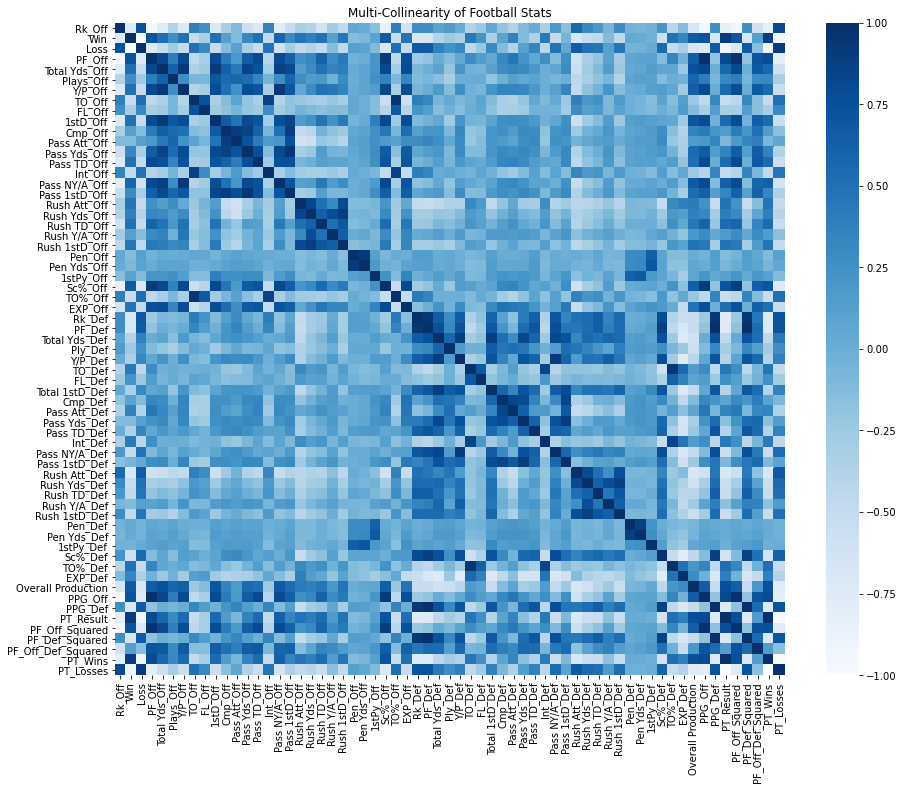

In [69]:
# Storing subplots in fig and ax variables
fig, ax = plt.subplots(figsize=(15,12))

# Creating a seaborn heatmap with inputs df
sns.heatmap(inputs.corr(), center=0, cmap="Blues")#annot=True

# Setting the title 
ax.set_title("Multi-Collinearity of Football Stats")